In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_absolute_error,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
!pip install scikit-multilearn
from sklearn.multioutput import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from sklearn.cluster import KMeans
import pickle
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

     |████████████████████████████████| 89 kB 3.6 MB/s 


Please upload the clean data file shared in the zip folder.

In [2]:
df= pd.read_csv("data_clean.csv")

In [3]:
df.head()

,Age,Weight,FCVC,NCP,CH2O,FAF,Gender,family_history_with_overweight,FAVC,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE,SCC,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II,"Age_Group_(13.999, 19.0]","Age_Group_(19.0, 22.0]","Age_Group_(22.0, 26.0]","Age_Group_(26.0, 61.0]"
0,0.148936,0.186567,0.5,0.666667,0.5,0.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.148936,0.126866,1.0,0.666667,1.0,1.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.191489,0.283582,0.5,0.666667,0.5,0.666667,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.276596,0.358209,1.0,0.666667,0.5,0.666667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.170213,0.379104,0.5,0.000000,0.5,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [4]:
df.columns

Index(['Age', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'Gender',
       'family_history_with_overweight', 'FAVC', 'CAEC_Always',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE', 'SCC',
       'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no',
       'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'NObeyesdad_Insufficient_Weight', 'NObeyesdad_Normal_Weight',
       'NObeyesdad_Obesity_Type_I', 'NObeyesdad_Obesity_Type_II',
       'NObeyesdad_Obesity_Type_III', 'NObeyesdad_Overweight_Level_I',
       'NObeyesdad_Overweight_Level_II', 'Age_Group_(13.999, 19.0]',
       'Age_Group_(19.0, 22.0]', 'Age_Group_(22.0, 26.0]',
       'Age_Group_(26.0, 61.0]'],
      dtype='object')

In [5]:
df.rename(columns={ 'Age_Group_(13.999, 19.0]': 'Age_Group_14_19','Age_Group_(19.0, 22.0]' : 'Age_Group_19.0_22.0' , 'Age_Group_(22.0, 26.0]' : 'Age_Group_23.0_26.0',
       'Age_Group_(26.0, 61.0]' : 'Age_Group_27.0_61.0'}, inplace=True)

Classifying the people whether they monitor the calorie consumption or not.

In [6]:
X =  df.drop(columns = ['SCC']).copy()

In [7]:
Y = df['SCC']

Splitting the dataset into training, testing and validation datasets.

In [8]:
train_size=0.6

In [9]:
X_train, X_rem, y_train, y_rem = train_test_split(X,Y, train_size=0.6, shuffle= True)

In [10]:
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, shuffle= True)

In [11]:
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(1266, 34)
(1266,)
(422, 34)
(422,)
(423, 34)
(423,)


(None, None)

Using Support Vector Machine for performing binary classification.

In [12]:
from sklearn.model_selection import cross_val_score
c = [0.1, 0.25, 0.5,1,2]
for i in c:   
  model_soft=SVC(kernel= 'linear',C=i)
  model_soft.fit(X_train,y_train)
  # calculating training accuracy
  accuracies = cross_val_score(estimator = model_soft, X = X_train, y = y_train, cv = 5)
  validation_accuracies = cross_val_score(estimator = model_soft, X = X_valid, y = y_valid, cv = 5)
  test_accuracies = cross_val_score(estimator = model_soft, X = X_test, y = y_test, cv = 5)
  # printing training accuracy
  print("\nThe accuracy with C:{:.2f}:".format(i), accuracies.mean())
  print("\nThe validation accuracy with C:{:.2f}:".format(i), validation_accuracies.mean())
  print("\nThe test accuracy with C:{:.2f}:".format(i), test_accuracies.mean())


The accuracy with C:0.10: 0.9541875447387259

The validation accuracy with C:0.10: 0.9597478991596639

The test accuracy with C:0.10: 0.9503641456582633

The accuracy with C:0.25: 0.9541875447387259

The validation accuracy with C:0.25: 0.9597478991596639

The test accuracy with C:0.25: 0.9503641456582633

The accuracy with C:0.50: 0.9541875447387259

The validation accuracy with C:0.50: 0.9597478991596639

The test accuracy with C:0.50: 0.9503641456582633

The accuracy with C:1.00: 0.9541875447387259

The validation accuracy with C:1.00: 0.9597478991596639

The test accuracy with C:1.00: 0.9432773109243697

The accuracy with C:2.00: 0.9541875447387259

The validation accuracy with C:2.00: 0.9550140056022409

The test accuracy with C:2.00: 0.9361624649859944


In [13]:
# save the model to disk
filename = 'svm_model_1.pkl'
pickle.dump(model_soft, open(filename, 'wb'))

Using random forest classifier.

In [14]:
rfc = RandomForestClassifier()

In [15]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
# model assessment
pred_test_rfc = rfc.predict(X_test)
pred_valid_rfc = rfc.predict(X_valid)
pred_train_rfc = rfc.predict(X_train)


In [17]:
print('Train Accuracy: ', accuracy_score(y_train, pred_train_rfc))
print('Validation Accuracy: ', accuracy_score(y_valid, pred_valid_rfc))
print('Test Accuraccy: ', accuracy_score(y_test, pred_test_rfc))

Train Accuracy:  1.0
Validation Accuracy:  0.976303317535545
Test Accuraccy:  0.9598108747044918


Using XGBoost classifier

In [18]:
import time
from xgboost import XGBClassifier

In [19]:
xgbmodel = XGBClassifier(early_stopping=10,n_estimators=50, random_state=0)

In [20]:
# fit the model
xgbmodel.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, early_stopping=10,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [21]:
# model assessment
pred_test = xgbmodel.predict(X_test)
pred_train = xgbmodel.predict(X_train)
pred_validation = xgbmodel.predict(X_valid)

In [22]:
print('Train Accuracy: ', accuracy_score(y_train, pred_train))
print('Validation Accuraccy: ', accuracy_score(y_valid, pred_validation))
print('Test Accuraccy: ', accuracy_score(y_test, pred_test))

Train Accuracy:  0.981042654028436
Validation Accuraccy:  0.9715639810426541
Test Accuraccy:  0.9598108747044918


In [23]:
model_new = XGBClassifier(n_estimators=50, random_state=0,reg_lambda=1)

In [24]:
# define the eval set and metric
eval_set = [(X_train,y_train), (X_valid, y_valid)]
eval_metric = ["mlogloss","error"]

In [25]:
model_new.fit(X_train,y_train, eval_set=eval_set, eval_metric= ["logloss", "mae"], verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [26]:
# retrieve performance metrics
results =  model_new.evals_result()


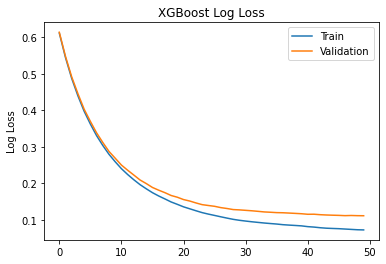

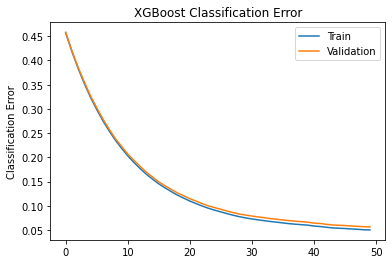

In [27]:
epochs = len(results['validation_0']['mae'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Validation')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mae'], label='Train')
ax.plot(x_axis, results['validation_1']['mae'], label='Validation')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

In [28]:
# save the model to disk
filename = 'xgb_model_1.pkl'
pickle.dump(model_new, open(filename, 'wb'))

Unsupervised Algorithm

In [ ]:
Kmean = KMeans(n_clusters=2)

In [ ]:
Kmean.fit(X_train)

KMeans(n_clusters=2)

In [ ]:
Kmean.cluster_centers_

array([[3.73180291e-01, 3.56784142e-01, 6.77619109e-01, 5.66073327e-01,
        4.48716125e-01, 3.27614339e-01, 3.61842105e-01, 8.81578947e-01,
        9.24342105e-01, 3.28947368e-02, 6.57894737e-02, 8.94736842e-01,
        6.57894737e-03, 2.30263158e-02, 6.50521303e-19, 5.92105263e-02,
        5.85526316e-01, 3.55263158e-01, 9.34210526e-01, 2.60208521e-18,
        6.57894737e-03, 4.60526316e-02, 1.31578947e-02, 7.89473684e-02,
        1.01973684e-01, 2.46710526e-01, 2.46710526e-01, 1.38777878e-16,
        1.41447368e-01, 1.84210526e-01, 9.86842105e-02, 4.60526316e-02,
        8.88157895e-02, 7.66447368e-01],
       [1.61343832e-01, 3.55010417e-01, 7.23552797e-01, 5.51008031e-01,
        5.24235011e-01, 3.40475336e-01, 5.45738046e-01, 8.02494802e-01,
        8.74220374e-01, 2.49480249e-02, 1.38253638e-01, 8.10810811e-01,
        2.59875260e-02, 1.87110187e-02, 1.03950104e-03, 2.59875260e-02,
        6.94386694e-01, 2.78586279e-01, 5.55111512e-16, 3.11850312e-03,
        4.15800416e-03,

In [ ]:
Kmean.labels_

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
# model assessment
pred_testk = Kmean.predict(X_test)
pred_traink = Kmean.predict(X_train)
pred_validationk = Kmean.predict(X_valid)

In [ ]:
print('Train Accuracy: ', accuracy_score(y_train, pred_traink))
print('Validation Accuraccy: ', accuracy_score(y_valid, pred_validationk))
print('Test Accuraccy: ', accuracy_score(y_test, pred_testk))

Train Accuracy:  0.2685624012638231
Validation Accuraccy:  0.25118483412322273
Test Accuraccy:  0.26713947990543735


Classification of the dataset into the 4 age groups

In [ ]:
df.columns

Index(['Age', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'Gender',
       'family_history_with_overweight', 'FAVC', 'CAEC_Always',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE', 'SCC',
       'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no',
       'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'NObeyesdad_Insufficient_Weight', 'NObeyesdad_Normal_Weight',
       'NObeyesdad_Obesity_Type_I', 'NObeyesdad_Obesity_Type_II',
       'NObeyesdad_Obesity_Type_III', 'NObeyesdad_Overweight_Level_I',
       'NObeyesdad_Overweight_Level_II', 'Age_Group_14_19',
       'Age_Group_19.0_22.0', 'Age_Group_23.0_26.0', 'Age_Group_27.0_61.0'],
      dtype='object')

In [ ]:
X2 =  df.drop(columns = ['Age_Group_14_19',
       'Age_Group_19.0_22.0', 'Age_Group_23.0_26.0', 'Age_Group_27.0_61.0']).copy()

In [ ]:
Y2 = df[['Age_Group_14_19',
       'Age_Group_19.0_22.0', 'Age_Group_23.0_26.0', 'Age_Group_27.0_61.0']]

Splitting the dataset into Training set, validation set and Testing set

In [ ]:
train_size2=0.6

In [ ]:
X_train2, X_rem2, y_train2, y_rem2 = train_test_split(X2,Y2, train_size=0.6, shuffle= True)

In [ ]:
test_size = 0.5
X_valid2, X_test2, y_valid2, y_test2 = train_test_split(X_rem2,y_rem2, test_size=0.5, shuffle= True)

Classifier Chains of Naive Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
classifier = ClassifierChain(GaussianNB())

In [ ]:
classifier.fit(X_train2, y_train2)

ClassifierChain(base_estimator=GaussianNB())

In [ ]:
predictions = classifier.predict(X_test2)

In [ ]:
train_predictions = classifier.predict(X_train2)

In [ ]:
validation_predictions = classifier.predict(X_valid2)

In [ ]:
print('Train Accuracy: ', accuracy_score(y_train2, train_predictions))

Train Accuracy:  0.5229067930489731


In [ ]:
print('Test Accuracy: ', accuracy_score(y_test2,predictions))

Test Accuracy:  0.541371158392435


In [ ]:
print('Test Accuracy: ', accuracy_score(y_valid2,validation_predictions))

Test Accuracy:  0.5118483412322274


Random Forest Classifier using labelpower set

In [ ]:
classifierrfc = LabelPowerset(
    classifier = RandomForestClassifier(),
    require_dense = [False, True]
)

In [ ]:
classifierrfc.fit(X_train2, y_train2)

LabelPowerset(classifier=RandomForestClassifier(), require_dense=[False, True])

In [ ]:
y_predvalidation = classifierrfc.predict(X_valid2)

In [ ]:
y_pred = classifierrfc.predict(X_test2)

In [ ]:
y_predtrain = classifierrfc.predict(X_train2)

In [ ]:
print('the test accuracy:', accuracy_score(y_test2,y_pred))

the test accuracy: 0.983451536643026


In [ ]:
print('the train accuracy:', accuracy_score(y_train2,y_predtrain))

the train accuracy: 1.0


In [ ]:
print('the validation accuracy:', accuracy_score(y_valid2,y_predvalidation))

the validation accuracy: 0.9881516587677726


## Classification of People based on Obesity Level 

In [ ]:
obesity = pd.read_csv("data_clean.csv")
obesity.head()

,Age,Weight,FCVC,NCP,CH2O,FAF,Gender,family_history_with_overweight,FAVC,CAEC_Always,...,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II,"Age_Group_(13.999, 19.0]","Age_Group_(19.0, 22.0]","Age_Group_(22.0, 26.0]","Age_Group_(26.0, 61.0]"
0,0.148936,0.186567,0.5,0.666667,0.5,0.000000,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.148936,0.126866,1.0,0.666667,1.0,1.000000,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.191489,0.283582,0.5,0.666667,0.5,0.666667,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.276596,0.358209,1.0,0.666667,0.5,0.666667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.170213,0.379104,0.5,0.000000,0.5,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
def obesity_level(X,y,z):
    train_size=0.6
    Xtrain, Xremaining, ytrain, yremaining = train_test_split(X,y, train_size=0.6, shuffle= True)
    test_size = 0.5
    Xtest, Xvalidation, ytest, yvalidation = train_test_split(Xremaining,yremaining, test_size=0.5, shuffle= True)
    
    # "Support vector classifier"
    model = SVC(kernel='poly', C=1E10)
    model.fit(Xtrain, ytrain)
    ypred = model.predict(Xtest)
    ypredvalidation = model.predict(Xvalidation)
    

    accuracy_hard_margin = accuracy_score(ytest,ypred)
    accuracy_hard_margin_valid = accuracy_score(yvalidation,ypredvalidation)
    return accuracy_hard_margin,accuracy_hard_margin_valid,z

In [ ]:
def append_accuracy_name(X,Y,Z,arr,arr_val,name):
    accuracy,accuracy_validation ,obese_type = obesity_level(X,Y,Z)
    arr.append(accuracy)
    arr_val.append(accuracy_validation)
    name.append(obese_type)
    return arr,name,arr_val

In [ ]:
X = obesity[['Age', 'Weight', 'FCVC', 'NCP','CH2O','FAF','Gender','family_history_with_overweight','FAVC','CAEC_Always','CAEC_Frequently','CAEC_Sometimes','CAEC_no','SMOKE','SCC',
        'CALC_Always','CALC_Frequently','CALC_Sometimes','CAEC_no','MTRANS_Automobile','MTRANS_Bike','MTRANS_Motorbike','MTRANS_Public_Transportation','MTRANS_Walking']]
arr = []
arr_val = []
name = []
arr, name, arr_val = append_accuracy_name(X,obesity['NObeyesdad_Insufficient_Weight'],'Insufficient_Weight',arr,arr_val,name)
arr, name, arr_val = append_accuracy_name(X,obesity['NObeyesdad_Normal_Weight'],'Normal_Weight',arr,arr_val,name)
arr, name, arr_val = append_accuracy_name(X,obesity['NObeyesdad_Obesity_Type_I'],'Obesity_Type_I',arr,arr_val,name)
arr, name, arr_val = append_accuracy_name(X,obesity['NObeyesdad_Obesity_Type_II'],'Obesity_Type_II',arr,arr_val,name)
arr, name, arr_val = append_accuracy_name(X,obesity['NObeyesdad_Obesity_Type_III'],'Obesity_Type_III',arr,arr_val,name)
arr, name, arr_val = append_accuracy_name(X,obesity['NObeyesdad_Overweight_Level_I'],'Overweight_Level_I',arr,arr_val,name)
arr, name, arr_val = append_accuracy_name(X,obesity['NObeyesdad_Overweight_Level_II'],'Overweight_Level_II',arr,arr_val,name)

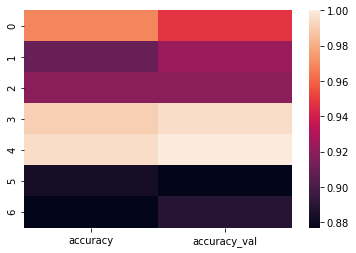

In [ ]:
svm_model_accuracy = {'Obesity_Type': name,'accuracy': arr,'validation_accuracy':arr_val}
df_heatmap = pd.DataFrame(svm_model_accuracy, columns = ['Obesity_Type', 'accuracy','validation_accuracy'])
df2 = pd.DataFrame({"accuracy":df_heatmap['accuracy'],"accuracy_val":df_heatmap['validation_accuracy']})
sns.heatmap(df2)
plt.show()

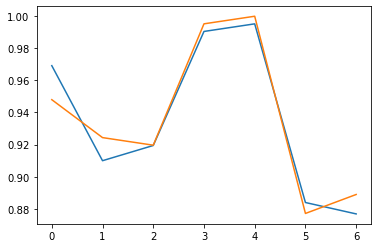

In [ ]:
plt.plot(df2, linestyle = 'solid')
plt.show()

## Classification of People based on Transportation Mode 

In [ ]:
def transportation_classification(X,y,z):
    train_size=0.6
    Xtrain, Xremaining, ytrain, yremaining = train_test_split(X,y, train_size=0.6, shuffle= True)
    test_size = 0.5
    Xtest, Xvalidation, ytest, yvalidation = train_test_split(Xremaining,yremaining, test_size=0.5, shuffle= True)
    #Split into training and test data (60/40)
    #Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.4, random_state = 42)
    model = RandomForestClassifier(n_estimators=1000)
    model.fit(Xtrain, ytrain)
    y_pred = model.predict(Xtest)
    ypredvalidation = model.predict(Xvalidation)
    
    accuracy = accuracy_score(ytest,y_pred)
    accuracy_valid = accuracy_score(yvalidation,ypredvalidation)
    return accuracy,accuracy_valid,z

In [ ]:
X = obesity[['Age', 'Weight', 'FCVC', 'NCP','CH2O','FAF','Gender','family_history_with_overweight','FAVC','CAEC_Always','CAEC_Frequently','CAEC_Sometimes','CAEC_no','SMOKE','SCC',
        'CALC_Always','CALC_Frequently','CALC_Sometimes','CAEC_no','NObeyesdad_Insufficient_Weight','NObeyesdad_Normal_Weight','NObeyesdad_Obesity_Type_I','NObeyesdad_Obesity_Type_II','NObeyesdad_Obesity_Type_III','NObeyesdad_Overweight_Level_I','NObeyesdad_Overweight_Level_II']]

In [ ]:
def append_accuracy_name(X,Y,Z,arr,arr_validate,name):
    accuracy ,accuracy_validation, transportation_type = transportation_classification(X,Y,Z)
    arr.append(accuracy)
    arr_validate.append(accuracy_validation)
    name.append(transportation_type)
    return arr,name,arr_validate

In [ ]:
arr = []
arr_validate = []
name = []
arr, name, arr_validate = append_accuracy_name(X,obesity['MTRANS_Automobile'],'Automobile',arr,arr_validate,name)
arr, name, arr_validate = append_accuracy_name(X,obesity['MTRANS_Bike'],'Bike',arr,arr_validate,name)
arr, name, arr_validate = append_accuracy_name(X,obesity['MTRANS_Motorbike'],'Motorbike',arr,arr_validate,name)
arr, name, arr_validate = append_accuracy_name(X,obesity['MTRANS_Public_Transportation'],'Public_Transportation',arr,arr_validate,name)
arr, name, arr_validate = append_accuracy_name(X,obesity['MTRANS_Walking'],'Walking',arr,arr_validate,name)

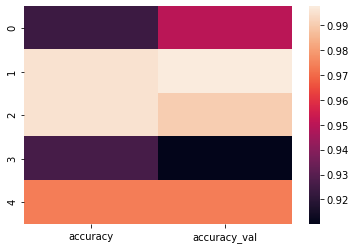

In [ ]:
randomforest_model_accuracy = {'transportation_type': name,'accuracy': arr, 'validation_accuracy':arr_validate}
df = pd.DataFrame(randomforest_model_accuracy, columns = ['transportation_type', 'accuracy','validation_accuracy'])
df2 = pd.DataFrame({"accuracy":df['accuracy'],"accuracy_val":df['validation_accuracy']})
sns.heatmap(df2)
plt.show()

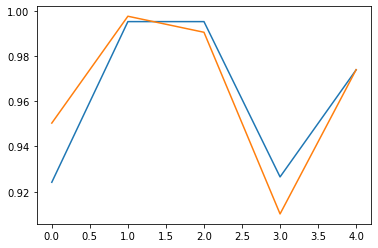

In [ ]:
plt.plot(df2, linestyle = 'solid')
plt.show()